#### Adicionando o caminho do projeto ao path

#### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [1]:
%pip install missingno
%pip install requests
%matplotlib inline

import numpy as np
import pandas as pd
import missingno as msno
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

#### Lendo os dados da base única de 2018 a 2024

In [2]:
df_accidents = pd.read_csv(
    "/content/datatran2018_2024_v0.csv"
)
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436718 entries, 0 to 436717
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      436718 non-null  float64
 1   data_inversa            436718 non-null  object 
 2   dia_semana              436718 non-null  object 
 3   horario                 436718 non-null  object 
 4   uf                      436718 non-null  object 
 5   br                      436267 non-null  float64
 6   km                      436267 non-null  object 
 7   causa_acidente          436718 non-null  object 
 8   tipo_acidente           436718 non-null  object 
 9   classificacao_acidente  436715 non-null  object 
 10  fase_dia                436718 non-null  object 
 11  sentido_via             436718 non-null  object 
 12  condicao_metereologica  436718 non-null  object 
 13  tipo_pista              436718 non-null  object 
 14  tracado_via         

#### Verificando os dados faltantes de cada coluna para ter uma visão geral da base

<Axes: >

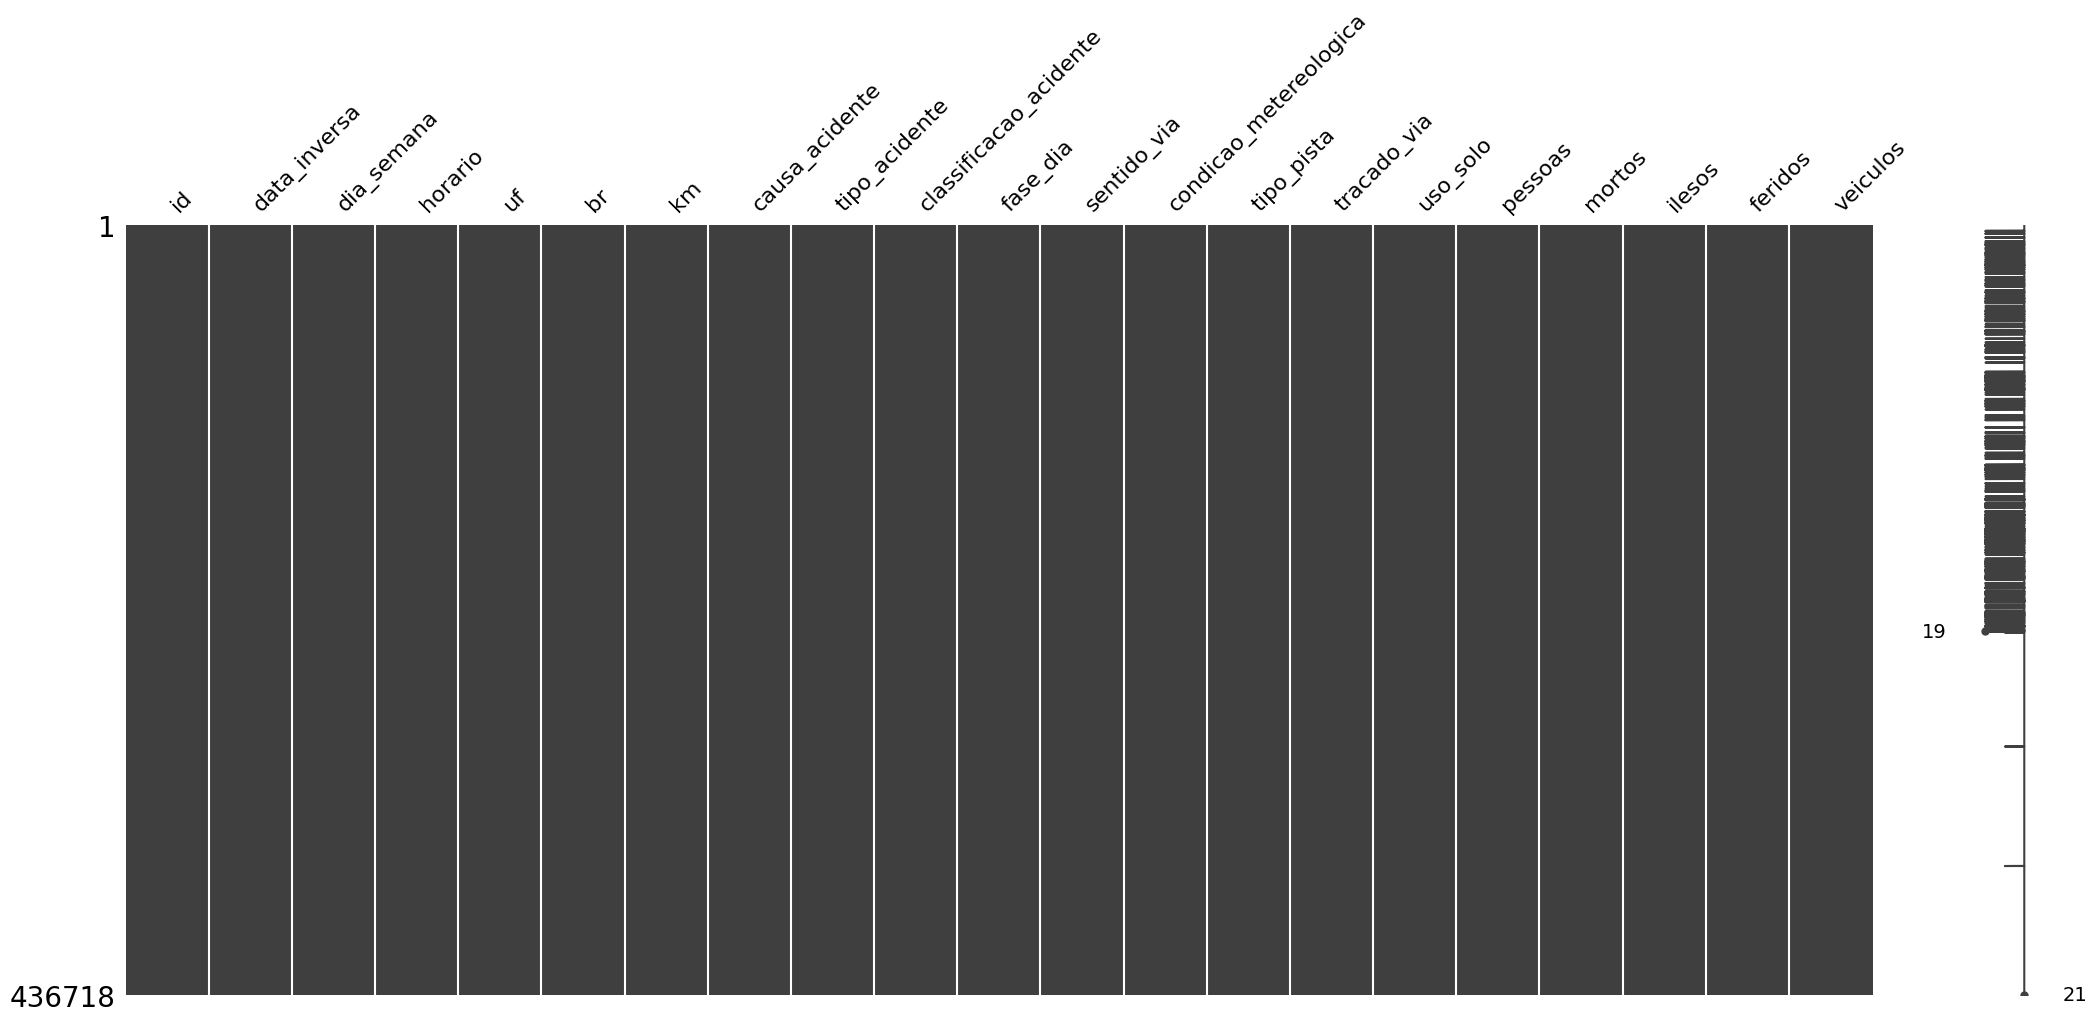

In [3]:
msno.matrix(df=df_accidents)

#### Criando funções auxiliares para tratar o dataframe

In [4]:
def capitalize(df):
    return df.apply(lambda data: data.capitalize())

# Verificando informações estatísticas das colunas

In [5]:
df_accidents["data_inversa"].describe()

,data_inversa
count,436718
unique,2373
top,2018-12-22
freq,325


In [6]:
df_accidents["horario"].describe()

,horario
count,436718
unique,1440
top,19:00:00
freq,6330


In [7]:
df_accidents["uf"].describe()

,uf
count,436718
unique,27
top,MG
freq,56711


In [8]:
df_accidents["br"].describe()

,br
count,436267.000000
mean,212.121939
std,130.577461
min,0.000000
25%,101.000000
50%,158.000000
75%,324.000000
max,498.000000


In [9]:
df_accidents["km"].describe()

,km
count,436267
unique,9740
top,1
freq,1911


In [10]:
df_accidents["causa_acidente"].describe()

,causa_acidente
count,436718
unique,91
top,Falta de Atenção à Condução
freq,73231


In [11]:
df_accidents["tipo_acidente"].describe()

,tipo_acidente
count,436718
unique,21
top,Colisão traseira
freq,82354


In [12]:
df_accidents["classificacao_acidente"].describe()

,classificacao_acidente
count,436715
unique,3
top,Com Vítimas Feridas
freq,327874


In [13]:
df_accidents["fase_dia"].describe()

,fase_dia
count,436718
unique,4
top,Pleno dia
freq,238933


In [14]:
df_accidents["sentido_via"].describe()

,sentido_via
count,436718
unique,3
top,Crescente
freq,233661


In [15]:
df_accidents["condicao_metereologica"].describe()

,condicao_metereologica
count,436718
unique,10
top,Céu Claro
freq,262859


In [16]:
df_accidents["tipo_pista"].describe()

,tipo_pista
count,436718
unique,3
top,Simples
freq,217959


In [17]:
df_accidents["tracado_via"].describe()

,tracado_via
count,436718
unique,973
top,Reta
freq,258186


In [18]:
df_accidents["uso_solo"].describe()

,uso_solo
count,436718
unique,2
top,Não
freq,245773


In [19]:
df_accidents["pessoas"].describe()

,pessoas
count,436718.000000
mean,2.468852
std,2.033143
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,95.000000


In [20]:
df_accidents["mortos"].describe()

,mortos
count,436718.000000
mean,0.081501
std,0.337769
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,37.000000


In [21]:
df_accidents["ilesos"].describe()

,ilesos
count,436718.000000
mean,1.025886
std,1.581182
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,78.000000


In [22]:
df_accidents["feridos"].describe()

,feridos
count,436718.000000
mean,1.138735
std,1.208558
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,84.000000


In [23]:
df_accidents["veiculos"].describe()

,veiculos
count,436718.000000
mean,1.808357
std,0.954748
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,131.000000


# Verificando dados faltantes das colunas

In [24]:
def get_na(column):
    return f'Dados faltantes da coluna {column}: {df_accidents[column].isna().sum()}'

print(get_na("data_inversa"))
print(get_na("horario"))
print(get_na("uf"))
print(get_na("br"))
print(f'Dados preenchidos com zero na coluna br: {df_accidents[df_accidents["br"] == 0].value_counts().sum()}')
print(get_na("km"))
print(get_na("causa_acidente"))
print(get_na("tipo_acidente"))
print(get_na("classificacao_acidente"))
print(get_na("fase_dia"))
print(get_na("sentido_via"))
print(get_na("condicao_metereologica"))
print(get_na("tipo_pista"))
print(get_na("tracado_via"))
print(get_na("uso_solo"))
print(get_na("pessoas"))
print(get_na("mortos"))
print(get_na("ilesos"))
print(get_na("feridos"))
print(get_na("veiculos"))

Dados faltantes da coluna data_inversa: 0
Dados faltantes da coluna horario: 0
Dados faltantes da coluna uf: 0
Dados faltantes da coluna br: 451
Dados preenchidos com zero na coluna br: 545
Dados faltantes da coluna km: 451
Dados faltantes da coluna causa_acidente: 0
Dados faltantes da coluna tipo_acidente: 0
Dados faltantes da coluna classificacao_acidente: 3
Dados faltantes da coluna fase_dia: 0
Dados faltantes da coluna sentido_via: 0
Dados faltantes da coluna condicao_metereologica: 0
Dados faltantes da coluna tipo_pista: 0
Dados faltantes da coluna tracado_via: 0
Dados faltantes da coluna uso_solo: 0
Dados faltantes da coluna pessoas: 0
Dados faltantes da coluna mortos: 0
Dados faltantes da coluna ilesos: 0
Dados faltantes da coluna feridos: 0
Dados faltantes da coluna veiculos: 0


# Verificando frequência dos dados das colunas

In [25]:
df_accidents["data_inversa"].value_counts().sort_index()

,count
data_inversa,
2018-01-01,222
2018-01-02,253
2018-01-03,216
2018-01-04,246
2018-01-05,254
...,...
2024-12-27,211
2024-12-28,200
2024-12-29,145


In [26]:
df_accidents["horario"].value_counts().sort_index()

,count
horario,
00:00:00,895
00:01:00,202
00:02:00,57
00:03:00,30
00:04:00,17
...,...
23:55:00,279
23:56:00,11
23:57:00,14


In [27]:
df_accidents["uf"].value_counts().sort_index()

,count
uf,
AC,1646
AL,4156
AM,803
AP,1022
BA,23500
CE,9912
DF,6428
ES,16210
GO,21124


In [28]:
df_accidents["br"].value_counts().sort_index()

,count
br,
0.0,545
10.0,2641
20.0,5446
30.0,136
40.0,20747
...,...
488.0,168
493.0,1624
494.0,1


In [29]:
df_accidents["km"].value_counts().sort_index()

,count
km,
0,1399
"0,1",226
"0,2",198
"0,3",212
"0,4",161
...,...
"998,4",1
"998,9",1
999,20


In [30]:
print("20 MAIORES CAUSAS DE ACIDENTES")
print(df_accidents["causa_acidente"].value_counts().head(20))
print("\n")
print("20 MENORES CAUSAS DE ACIDENTES")
print(df_accidents["causa_acidente"].value_counts().tail(20))

20 MAIORES CAUSAS DE ACIDENTES
causa_acidente
Falta de Atenção à Condução                                  73231
Velocidade Incompatível                                      35819
Reação tardia ou ineficiente do condutor                     32348
Ausência de reação do condutor                               29866
Desobediência às normas de trânsito pelo condutor            24089
Acessar a via sem observar a presença dos outros veículos    21351
Ingestão de Álcool                                           15689
Condutor deixou de manter distância do veículo da frente     15628
Condutor Dormindo                                            14679
Ingestão de álcool pelo condutor                             13933
Manobra de mudança de faixa                                  13548
Não guardar distância de segurança                           12082
Defeito Mecânico no Veículo                                  11190
Demais falhas mecânicas ou elétricas                         10368
Ultrapassagem In

In [31]:
df_accidents["tipo_acidente"].value_counts()

,count
tipo_acidente,
Colisão traseira,82354
Saída de leito carroçável,68689
Colisão transversal,54937
Tombamento,36266
Colisão frontal,29477
Colisão lateral,24809
Colisão lateral mesmo sentido,23563
Atropelamento de Pedestre,20296
Queda de ocupante de veículo,19623


In [32]:
df_accidents["classificacao_acidente"].value_counts()

,count
classificacao_acidente,
Com Vítimas Feridas,327874
Sem Vítimas,78301
Com Vítimas Fatais,30540


In [33]:
df_accidents["fase_dia"].value_counts()

,count
fase_dia,
Pleno dia,238933
Plena Noite,152663
Anoitecer,24066
Amanhecer,21056


In [34]:
df_accidents["sentido_via"].value_counts()

,count
sentido_via,
Crescente,233661
Decrescente,202061
Não Informado,996


In [35]:
df_accidents["condicao_metereologica"].value_counts()

,count
condicao_metereologica,
Céu Claro,262859
Nublado,71755
Chuva,47270
Sol,29126
Garoa/Chuvisco,15289
Ignorado,5899
Nevoeiro/Neblina,3671
Vento,825
Granizo,17


In [36]:
df_accidents["tipo_pista"].value_counts()

,count
tipo_pista,
Simples,217959
Dupla,180760
Múltipla,37999


In [37]:
df_accidents["tracado_via"].value_counts().head(20)

,count
tracado_via,
Reta,258186
Curva,62709
Não Informado,25504
Interseção de vias,10724
Rotatória,7849
Desvio Temporário,6580
Interseção de Vias,6095
Reta;Declive,4918
Retorno Regulamentado,4521


In [38]:
df_accidents["uso_solo"].value_counts()

,count
uso_solo,
Não,245773
Sim,190945


In [39]:
df_accidents["pessoas"].value_counts().head(20)

,count
pessoas,
2,179259
1,107301
3,81623
4,34355
5,17122
6,7986
7,3739
8,1911
9,987


In [40]:
df_accidents["veiculos"].value_counts().head(15)

,count
veiculos,
2,205775
1,174178
3,37665
4,11663
5,4343
6,1541
7,712
8,335
9,166


In [41]:
df_accidents["mortos"].value_counts().head(10).sort_index()

,count
mortos,
0,406178
1,27008
2,2638
3,562
4,206
5,76
6,24
7,12
8,5


In [42]:
df_accidents["ilesos"].value_counts().head(10).sort_index()

,count
ilesos,
0,163153
1,177281
2,61404
3,19564
4,8157
5,3481
6,1466
7,705
8,349


In [43]:
df_accidents["feridos"].value_counts().head(10).sort_index()

,count
feridos,
0,97425
1,240296
2,69957
3,16100
4,7125
5,3174
6,1157
7,469
8,268


# Tratamento dos dados

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "br"

In [44]:
df_accidents.dropna(subset=["br"], inplace=True)
df_accidents.drop(df_accidents[df_accidents['br'] == 0].index, inplace=True)

print(f'Dados preenchidos com zero na coluna br: {df_accidents[df_accidents["br"] == 0].value_counts().sum()}')

Dados preenchidos com zero na coluna br: 0


#### Convertendo a coluna data_inversa para Datetime

In [45]:
df_accidents["data_inversa"] = pd.to_datetime(
    df_accidents["data_inversa"], format="%Y-%m-%d")
df_accidents.dtypes

,0
id,float64
data_inversa,datetime64[ns]
dia_semana,object
horario,object
uf,object
br,float64
km,object
causa_acidente,object
tipo_acidente,object
classificacao_acidente,object


#### Tratamento da coluna "dia_semana" para corrigir codificação

In [46]:
df_accidents["dia_semana"] = pd.to_datetime(
    df_accidents["data_inversa"], format='%Y/%m/%d').dt.day_of_week.map({
        0: "Segunda-feira",
        1: "Terça-feira",
        2: "Quarta-feira",
        3: "Quinta-feira",
        4: "Sexta-feira",
        5: "Sábado",
        6: "Domingo"
    })
df_accidents["dia_semana"].value_counts()

,count
dia_semana,
Domingo,71949
Sábado,71724
Sexta-feira,67124
Segunda-feira,59373
Quinta-feira,56613
Quarta-feira,54973
Terça-feira,53966


#### Tratamento da coluna causa_acidente para unificar causas de acidentes similares

In [47]:
def get_causes():
    try:
        with open("/content/causas_acidentes.json", "r", encoding="utf-8") as file:
            return json.load(file)
    except Exception as exception:
        print(exception)
        return {}


def get_condition_to_make_changes(causes):
    return df_accidents["causa_acidente"].str.strip().isin(
        causes.keys())


def get_value_if_match(causes):
    return df_accidents["causa_acidente"].str.strip().map(
        lambda cause: causes.get(cause, cause).capitalize())


def get_value_if_not_match():
    return df_accidents["causa_acidente"].str.strip().str.capitalize()


causes = get_causes()
df_accidents["causa_acidente"] = np.where(
    get_condition_to_make_changes(causes), get_value_if_match(causes), get_value_if_not_match())
df_accidents["causa_acidente"].dropna(inplace=True)
df_accidents["causa_acidente"].value_counts()

[Errno 2] No such file or directory: '/content/causas_acidentes.json'


,count
causa_acidente,
Falta de atenção à condução,73110
Velocidade incompatível,35750
Reação tardia ou ineficiente do condutor,32255
Ausência de reação do condutor,29809
Desobediência às normas de trânsito pelo condutor,24029
...,...
Redutor de velocidade em desacordo,27
Faróis desregulados,24
Sinalização encoberta,15


#### Tratamento da coluna "tipo_acidente" para capitalizar os dados

In [48]:
df_accidents["tipo_acidente"] = capitalize(
    df_accidents["tipo_acidente"])
df_accidents["tipo_acidente"].value_counts()

,count
tipo_acidente,
Colisão traseira,82185
Saída de leito carroçável,68602
Colisão transversal,54785
Tombamento,36223
Colisão frontal,29421
Colisão lateral,24750
Colisão lateral mesmo sentido,23486
Atropelamento de pedestre,20276
Queda de ocupante de veículo,19596


#### Tratamento da coluna "tipo_acidente" para remover os dados que são outliers

In [49]:
df_accidents = df_accidents[~df_accidents["tipo_acidente"].isin(
    [
        "Sinistro pessoal de trânsito"
    ]
)]
df_accidents["tipo_acidente"].value_counts()

,count
tipo_acidente,
Colisão traseira,82185
Saída de leito carroçável,68602
Colisão transversal,54785
Tombamento,36223
Colisão frontal,29421
Colisão lateral,24750
Colisão lateral mesmo sentido,23486
Atropelamento de pedestre,20276
Queda de ocupante de veículo,19596


#### Tratamento da coluna "tipo_acidente" para unificar tipos semelhantes de colisão

In [50]:
df_accidents['tipo_acidente'] = df_accidents['tipo_acidente'].replace({
    r'^Colisão lateral.*': 'Colisão lateral',
    r'^Colisão com objeto.*': 'Colisão com objeto'
}, regex=True)
df_accidents['tipo_acidente'].value_counts()

,count
tipo_acidente,
Colisão traseira,82185
Saída de leito carroçável,68602
Colisão transversal,54785
Colisão lateral,54784
Tombamento,36223
Colisão com objeto,32243
Colisão frontal,29421
Atropelamento de pedestre,20276
Queda de ocupante de veículo,19596


#### Tratamento da coluna "classificacao_acidente" para definir dados faltantes como "Sem classificação"

In [51]:
df_accidents.drop(
    df_accidents[df_accidents['classificacao_acidente'].isna()].index, inplace=True)

df_accidents["classificacao_acidente"] = capitalize(
    df_accidents["classificacao_acidente"])
df_accidents["classificacao_acidente"].value_counts()

,count
classificacao_acidente,
Com vítimas feridas,327461
Sem vítimas,77728
Com vítimas fatais,30518


#### Tratamento da coluna "fase_dia"

In [52]:
periods = {
    "Madrugada": (0, 5),
    "Manhã": (6, 11),
    "Tarde": (12, 17),
    "Noite": (18, 23)
}


def group_by_hour(df):
    return df[df["horario"].notna()]["horario"]


def to_datetime(df):
    return pd.to_datetime(df, format="%H:%M:%S").dt.hour


df = group_by_hour(df_accidents)
df = to_datetime(df)
df_accidents["fase_dia"] = df.apply(
    lambda hour: next(period for period, (start, end)
                      in periods.items() if start <= hour <= end)
)
df_accidents["fase_dia"].value_counts()

,count
fase_dia,
Tarde,133607
Noite,126190
Manhã,121226
Madrugada,54684


#### Tratamento da coluna "condicao_metereologica" para remover valor "Ignorado"

In [53]:
def get_condition():
    return df_accidents[df_accidents['condicao_metereologica'] == "Ignorado"]

df_accidents.drop(get_condition().index, inplace=True)
df_accidents["condicao_metereologica"].value_counts()

,count
condicao_metereologica,
Céu Claro,262210
Nublado,71610
Chuva,47200
Sol,29043
Garoa/Chuvisco,15254
Nevoeiro/Neblina,3666
Vento,824
Granizo,17
Neve,7


#### Removendo condições meteorológicas não representativas

In [54]:
df = df_accidents.copy()
df = df[~df["condicao_metereologica"].isin(
    [
        "Granizo",
        "Neve"
    ]
)]
df_accidents = df
df_accidents["condicao_metereologica"].value_counts()

,count
condicao_metereologica,
Céu Claro,262210
Nublado,71610
Chuva,47200
Sol,29043
Garoa/Chuvisco,15254
Nevoeiro/Neblina,3666
Vento,824


#### Tratamento da coluna "uso_solo" para alterar para "Urbano" quando "Sim" e "Rural" quando "Não"

In [55]:
df_accidents["uso_solo"] = np.where(
    df_accidents["uso_solo"] == "Sim", "Urbano", "Rural")

df_accidents["uso_solo"].value_counts().head()

,count
uso_solo,
Rural,241812
Urbano,187995


#### Tratamento da coluna "sentido_via" para remover dados com valor "Não Informado"

In [56]:
def get_condition():
    return df_accidents[df_accidents['sentido_via'] == "Não Informado"]


df_accidents.drop(get_condition().index, inplace=True)
df_accidents["sentido_via"].value_counts()

,count
sentido_via,
Crescente,230458
Decrescente,199349


#### Verificando a frequência dos valores da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [57]:
tracado_via = df_accidents["tracado_via"].value_counts().reset_index()
tracado_via

,tracado_via,count
0,Reta,253857
1,Curva,61752
2,Não Informado,25192
3,Interseção de vias,10542
4,Rotatória,7719
...,...,...
964,Desvio Temporário;Túnel;Interseção de Vias;Em ...,1
965,Retorno Regulamentado;Curva;Declive;Viaduto,1
966,Em Obras;Curva;Desvio Temporário;Interseção de...,1
967,Declive;Retorno Regulamentado;Curva;Interseção...,1


#### Exportando os traçados de via encontrados (973) para um arquivo para analisar como fazer o tratamento

In [58]:
tracado_via.index.to_frame(
    name="tracado_via").to_csv("/content/tracado_via.csv", index=False)

#### Removendo a coluna tracado_via, pois seus dados estão muito complexos para serem agrupados. Em alguns casos existem dados com Ponte;Reta e Reta;Ponte. Dessa forma, não é possível saber qual o valor correto. A remoção desta coluna não deve influenciar nas análises posteriores

In [59]:
df_accidents.drop(columns=[
    "tracado_via"
], inplace=True)
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429807 entries, 0 to 436717
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      429807 non-null  float64       
 1   data_inversa            429807 non-null  datetime64[ns]
 2   dia_semana              429807 non-null  object        
 3   horario                 429807 non-null  object        
 4   uf                      429807 non-null  object        
 5   br                      429807 non-null  float64       
 6   km                      429807 non-null  object        
 7   causa_acidente          429807 non-null  object        
 8   tipo_acidente           429807 non-null  object        
 9   classificacao_acidente  429807 non-null  object        
 10  fase_dia                429807 non-null  object        
 11  sentido_via             429807 non-null  object        
 12  condicao_metereologica  429807 non-

#### Tratamento da coluna "pessoas" para remover linhas, onde a frequência da quantidade de pessoas envolvidas, em um acidente, é menor que 7 (menos de 1 ocorrência por ano)

In [60]:
def get_condition():
    return df_accidents[df_accidents["pessoas"] >= 15]

df_accidents.drop(get_condition().index, inplace=True)
df_accidents['pessoas'].value_counts().head(20)

,count
pessoas,
2,176533
1,105103
3,80534
4,33887
5,16892
6,7886
7,3698
8,1891
9,975


In [61]:
def get_condition():
    return df_accidents[df_accidents["veiculos"] >= 11]

df_accidents.drop(get_condition().index, inplace=True)
df_accidents['veiculos'].value_counts().head(20)

,count
veiculos,
2,202422
1,170546
3,37107
4,11473
5,4248
6,1507
7,683
8,320
9,157


# Análise após tratamento dos dados

#### Ordenando o dataframe por data (crescente)

In [62]:
df_accidents = df_accidents.sort_values(by="data_inversa")
df_accidents["data_inversa"].value_counts().nlargest(10)

,count
data_inversa,
2018-12-22,320
2018-02-10,320
2024-12-21,314
2018-02-09,301
2023-12-23,299
2019-12-21,294
2020-12-19,286
2020-10-10,284
2024-10-20,279


#### Criando coluna auxiliar mes_ano para facilitar análise futura

In [63]:
df_accidents["mes_ano"] = df_accidents["data_inversa"].dt.to_period("M")
df_accidents["mes_ano"].value_counts().sort_index()

,count
mes_ano,
2018-01,6808
2018-02,6078
2018-03,6557
2018-04,5399
2018-05,4708
...,...
2024-08,6041
2024-09,6089
2024-10,6272


#### Obtendo lista de feriados obtida de uma base de dados externa

In [64]:
from datetime import datetime


def get_holidays(year):
    try:
        response = requests.get(
            f"https://brasilapi.com.br/api/feriados/v1/{year}")
        response.raise_for_status()
        return [{
            "date": datetime.strptime(data["date"], "%Y-%m-%d").strftime("%Y-%m-%d"),
            "name": data["name"]
        } for data in response.json()]
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar feriados de {year}: {e}")
        return []

#### Criando coluna feriado preenchendo os registros com o nome do feriado ou dia útil à partir de uma lista de feriados obtida de uma base de dados externa

In [65]:
def get_holidays_for_years(years):
    holidays_dict = {}
    for year in years:
        holidays = get_holidays(year)
        holidays_dict.update({
            pd.to_datetime(holiday["date"]).date(): holiday["name"] for holiday in holidays
        })

    return holidays_dict


df_accidents["tipo_data"] = df_accidents["data_inversa"].map(
    get_holidays_for_years([
        2018,
        2019,
        2020,
        2021,
        2022,
        2023,
        2024]
    )).fillna("Dia útil")
df_accidents["tipo_data"].value_counts()

,count
tipo_data,
Dia útil,413913
Confraternização mundial,1410
Tiradentes,1255
Dia do trabalho,1249
Proclamação da República,1247
Nossa Senhora Aparecida,1231
Independência do Brasil,1220
Páscoa,1210
Corpus Christi,1199


#### Criando coluna br_tipo para facilitar análises futuras e o modelo de ML

In [66]:
df_accidents["br_tipo"] = np.select([
    (df_accidents["br"] >= 10) & (df_accidents["br"] <= 99),
    (df_accidents["br"] >= 100) & (df_accidents["br"] <= 199),
    (df_accidents["br"] >= 200) & (df_accidents["br"] <= 299),
    (df_accidents["br"] >= 300) & (df_accidents["br"] <= 399),
    (df_accidents["br"] >= 400) & (df_accidents["br"] <= 499)
], [
    "Radial",
    "Longitudinal",
    "Transversal",
    "Diagonal",
    "De Ligação"
], default="Desconhecida")

df_accidents["br_tipo"].value_counts()


,count
br_tipo,
Longitudinal,184319
Diagonal,87929
Transversal,75067
Radial,47263
De Ligação,33989


#### Criando coluna causa_acidente_categoria para facilitar análises futuras e o modelo de ML

In [67]:
df_accidents['causa_acidente'] = df_accidents['causa_acidente'].replace({
    r'^Ingestão.*': 'Ingestão de álcool e/ou substâncias psicoativas',
    r'^Acumulo de.*': 'Acúmulo de água, óleo ou areia ou detritos sobre o pavimento',
    r'^Transtornos mentais.*': 'Transtornos mentais (exceto suicídio)',
}, regex=True)

df_accidents["causa_acidente_categoria"] = np.select([
    (df_accidents["causa_acidente"].isin([
        "Falta de atenção à condução",
        "Reação tardia ou ineficiente do condutor",
        "Ausência de reação do condutor",
        "Condutor deixou de manter distância do veículo da frente",
        "Condutor dormindo",
        "Falta de atenção do pedestre",
        "Entrada inopinada do pedestre",
        "Mal súbito",
        "Ingestão de álcool e/ou substâncias psicoativas",
        "Condutor usando celular",
        "Transtornos mentais (exceto suicídio)",
        "Suicídio (presumido)",
        "Desobediência às normas de trânsito pelo pedestre",
        "Obstrução via tentativa assalto",
        "Acessar a via sem observar a presença dos outros veículos",
        "Pedestre andava na pista",
    ])),
        (df_accidents["causa_acidente"].isin([
        "Defeito na via",
        "Pista escorregadia",
        "Pista esburacada",
        "Acúmulo de água, óleo ou areia ou detritos sobre o pavimento",
        "Afundamento ou ondulação no pavimento",
        "Deficiência do sistema de iluminação/sinalização",
        "Sinalização da via insuficiente ou inadequada",
        "Ausência de sinalização",
        "Sinalização mal posicionada",
        "Semáforo com defeito",
        "Redutor de velocidade em desacordo",
        "Sinalização encoberta",
        "Obras na pista",
        "Obstrução na via",
        "Sistema de drenagem ineficiente",
        "Faixas de trânsito com largura insuficiente",
        "Restrição de visibilidade",
        "Pista em desnível",
        "Acostamento em desnível",
        "Falta de acostamento",
        "Acesso irregular",
        "Área urbana sem local apropriado para travessia de pedestres",
        "Falta de elemento de contenção que evite saída do leito carroçável",
        "Curva acentuada",
        "Declive acentuado",
        "Demais falhas na via",
        "Falta de elemento de contenção que evite a saída do leito carroçável",
        "Desvio temporário",
        "Área urbana sem a presença de local apropriado para a travessia de pedestres"
    ])),
    (df_accidents["causa_acidente"].isin([
        "Velocidade incompatível",
        "Ultrapassagem indevida",
        "Transitar na contramão",
        "Manobra de mudança de faixa",
        "Trafegar com motocicleta (ou similar) entre as faixas",
        "Conversão proibida",
        "Transitar no acostamento",
        "Frear bruscamente",
        "Retorno proibido",
        "Estacionar ou parar em local proibido",
        "Transitar na calçada",
        "Desobediência às normas de trânsito pelo condutor",
        "Participar de racha",
        "Condutor desrespeitou a iluminação vermelha do semáforo",
        "Deixar de acionar o farol da motocicleta (ou similar)",
        "Desrespeitar a preferência no cruzamento"
    ])),
    (df_accidents["causa_acidente"].isin([
        "Defeito mecânico no veículo",
        "Demais falhas mecânicas ou elétricas",
        "Avarias e/ou desgaste excessivo no pneu",
        "Problema com o freio",
        "Problema na suspensão",
        "Deficiência ou não acionamento do sistema de iluminação/sinalização do veículo",
        "Modificação proibida",
        "Faróis desregulados"
    ])),
    (df_accidents["causa_acidente"].isin([
        "Chuva",
        "Fenômenos da natureza",
        "Demais fenômenos da natureza",
        "Neblina",
        "Fumaça"
    ])),
    (df_accidents["causa_acidente"].isin([
        "Animais na pista",
        "Agressão externa",
        "Carga excessiva e/ou mal acondicionada",
        "Objeto estático sobre o leito carroçável"
    ])),
], [
    "Fatores humanos",
    "Infraestrutura e condições da via",
    "Infrações",
    "Veículo e equipamentos",
    "Fatores ambientais e naturais",
    "Outras"
], default="Desconhecida")

print(df_accidents["causa_acidente_categoria"].value_counts())
print(df_accidents[df_accidents["causa_acidente_categoria"] == "Desconhecida"].value_counts().head())

causa_acidente_categoria
Fatores humanos                      228858
Infrações                            106005
Veículo e equipamentos                29919
Infraestrutura e condições da via     27300
Desconhecida                          16645
Outras                                14537
Fatores ambientais e naturais          5303
Name: count, dtype: int64
id        data_inversa  dia_semana     horario   uf  br     km     causa_acidente                                          tipo_acidente              classificacao_acidente  fase_dia   sentido_via  condicao_metereologica  tipo_pista  uso_solo  pessoas  mortos  ilesos  feridos  veiculos  mes_ano  tipo_data                 br_tipo       causa_acidente_categoria
659449.0  2024-12-29    Domingo        18:45:00  SE  235.0  42,4   Pedestre - ingestão de álcool/ substâncias psicoativas  Atropelamento de pedestre  Com vítimas feridas     Noite      Decrescente  Nublado                 Simples     Urbano    2        0       0       2        2

# Dados após tratamentos

In [69]:
print("AGRUPADO POR MÊS")
print(df_accidents["data_inversa"].dt.month.value_counts().sort_index())
print("\n")
print("AGRUPADO POR ANO")
print(df_accidents["data_inversa"].dt.year.value_counts().sort_index())
print("\n")
print(f'Média de acidentes por ano {df_accidents["data_inversa"].dt.year.value_counts().mean():.0f}')
print(f'Mediana de acidentes por ano {df_accidents["data_inversa"].dt.year.value_counts().median():.0f}')
print("\n")
print("AGRUPADO POR DATA")
print(df_accidents["data_inversa"].value_counts().head(10))
print("\n")

AGRUPADO POR MÊS
data_inversa
1     38380
2     35849
3     37830
4     35715
5     37053
6     37527
7     33697
8     33509
9     33754
10    34676
11    33392
12    37185
Name: count, dtype: int64


AGRUPADO POR ANO
data_inversa
2018    67914
2019    66178
2020    62529
2021    30429
2022    63276
2023    66476
2024    71765
Name: count, dtype: int64


Média de acidentes por ano 61224
Mediana de acidentes por ano 66178


AGRUPADO POR DATA
data_inversa
2018-12-22    320
2018-02-10    320
2024-12-21    314
2018-02-09    301
2023-12-23    299
2019-12-21    294
2020-12-19    286
2020-10-10    284
2024-10-20    279
2024-12-22    278
Name: count, dtype: int64




In [70]:
df_accidents["horario"].describe()

,horario
count,428567
unique,1440
top,19:00:00
freq,6147


In [71]:
print(df_accidents["dia_semana"].value_counts())
print(f'Média {df_accidents["dia_semana"].value_counts().mean():.0f}')
print(f'Mediana {df_accidents["dia_semana"].value_counts().median():.0f}')

dia_semana
Domingo          70655
Sábado           70489
Sexta-feira      66024
Segunda-feira    58455
Quinta-feira     55705
Quarta-feira     54124
Terça-feira      53115
Name: count, dtype: int64
Média 61224
Mediana 58455


#### Verificando dados estatísticos da coluna "br" após o tratamento dos dados

In [72]:
df = df_accidents["br"].value_counts()
df_top_br = pd.DataFrame({
    "frequência": df,
    "percentual": ((df / df.sum()) * 100).round(1)
})
df_top_br

,frequência,percentual
br,,
101.0,72939,17.0
116.0,64567,15.1
381.0,20622,4.8
40.0,20499,4.8
153.0,16631,3.9
...,...,...
477.0,1,0.0
494.0,1,0.0
466.0,1,0.0


#### Distribuição dos acidentes por rodovia (BR)

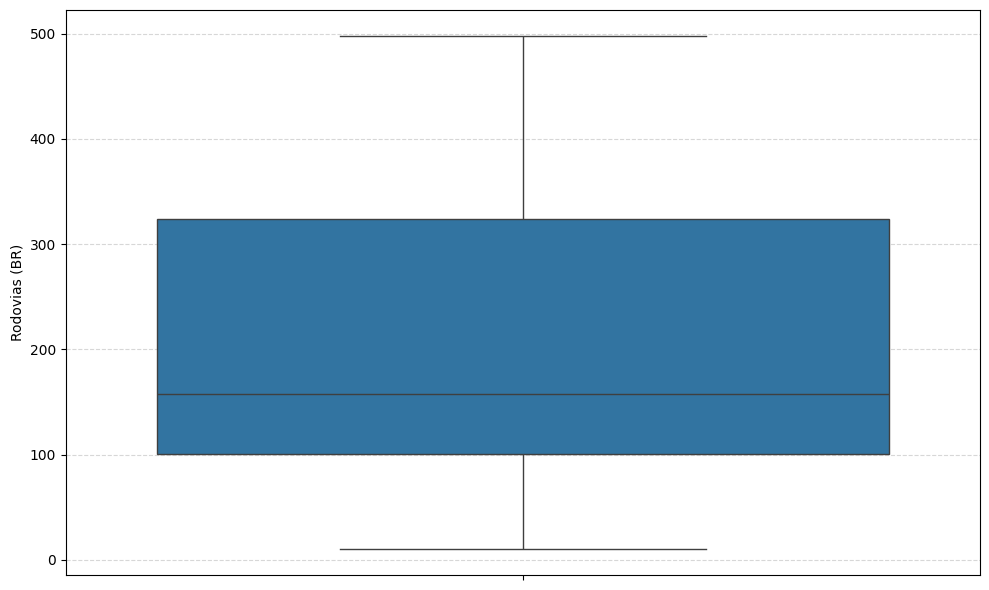

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_accidents["br"])
plt.ylabel("Rodovias (BR)")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### Agrupando os dados por br e km para identificar a quais rodovias pertencem os kms com mais acidentes

In [74]:
df = df_accidents.copy()
df = df.groupby(["km", "br"]).size().reset_index(
    name="frequência").sort_values("frequência", ascending=False).head(10)

df["percentual"] = (df["frequência"] / df["frequência"].sum()) * 100
df["percentual"] = df["percentual"].round(1)

print(df)

        km     br  frequência  percentual
27399  219  116.0         371        13.0
25289  206  101.0         297        10.4
25431  207  101.0         289        10.2
29445  230  116.0         285        10.0
28911  228  116.0         273         9.6
26157  210  101.0         270         9.5
28786  227  116.0         269         9.5
28251  223  116.0         266         9.4
25566  208  101.0         262         9.2
28112  222  116.0         262         9.2


In [75]:

print(df_accidents["uf"].value_counts())
print(f'Média {df_accidents["uf"].value_counts().mean():.0f}')
print(f'Mediana {df_accidents["uf"].value_counts().median():.0f}')

uf
MG    55467
SC    51272
PR    47421
RJ    31760
RS    30106
SP    28595
BA    22865
GO    20683
PE    17822
ES    16037
MT    14611
MS    10182
PB    10097
CE     9780
RO     9345
RN     8939
PI     8202
MA     7151
DF     6347
PA     5861
AL     4081
TO     3776
SE     3568
AC     1559
RR     1307
AP      978
AM      755
Name: count, dtype: int64
Média 15873
Mediana 9780


In [76]:
df_accidents["causa_acidente"].value_counts().head(10)

,count
causa_acidente,
Falta de atenção à condução,71855
Velocidade incompatível,35224
Reação tardia ou ineficiente do condutor,31565
Ingestão de álcool e/ou substâncias psicoativas,31521
Ausência de reação do condutor,29269
Desobediência às normas de trânsito pelo condutor,23718
Acessar a via sem observar a presença dos outros veículos,21039
Condutor deixou de manter distância do veículo da frente,15421
Condutor dormindo,14334


In [77]:
print(df_accidents["uf"].value_counts())
print(f'Média {df_accidents["uf"].value_counts().mean():.0f}')
print(f'Mediana {df_accidents["uf"].value_counts().median():.0f}')
print(df_accidents["tipo_acidente"].value_counts())
print(f'Média {df_accidents["tipo_acidente"].value_counts().mean():.0f}')
print(f'Mediana {df_accidents["tipo_acidente"].value_counts().median():.0f}')

uf
MG    55467
SC    51272
PR    47421
RJ    31760
RS    30106
SP    28595
BA    22865
GO    20683
PE    17822
ES    16037
MT    14611
MS    10182
PB    10097
CE     9780
RO     9345
RN     8939
PI     8202
MA     7151
DF     6347
PA     5861
AL     4081
TO     3776
SE     3568
AC     1559
RR     1307
AP      978
AM      755
Name: count, dtype: int64
Média 15873
Mediana 9780
tipo_acidente
Colisão traseira                81045
Saída de leito carroçável       67348
Colisão transversal             54213
Colisão lateral                 54046
Tombamento                      35598
Colisão com objeto              31758
Colisão frontal                 28771
Atropelamento de pedestre       19875
Queda de ocupante de veículo    19182
Capotamento                     12115
Incêndio                         8029
Atropelamento de animal          7322
Engavetamento                    6630
Derramamento de carga            1030
Eventos atípicos                 1007
Danos eventuais                   598


In [78]:
df_accidents["causa_acidente"].value_counts().head(10)

,count
causa_acidente,
Falta de atenção à condução,71855
Velocidade incompatível,35224
Reação tardia ou ineficiente do condutor,31565
Ingestão de álcool e/ou substâncias psicoativas,31521
Ausência de reação do condutor,29269
Desobediência às normas de trânsito pelo condutor,23718
Acessar a via sem observar a presença dos outros veículos,21039
Condutor deixou de manter distância do veículo da frente,15421
Condutor dormindo,14334


In [79]:
df_accidents["classificacao_acidente"].value_counts()

,count
classificacao_acidente,
Com vítimas feridas,322472
Sem vítimas,76528
Com vítimas fatais,29567


In [80]:
df_accidents["fase_dia"].value_counts()

,count
fase_dia,
Tarde,132485
Noite,123117
Manhã,120289
Madrugada,52676


In [81]:
df_accidents["condicao_metereologica"].value_counts()

,count
condicao_metereologica,
Céu Claro,261464
Nublado,71427
Chuva,47031
Sol,28984
Garoa/Chuvisco,15204
Nevoeiro/Neblina,3635
Vento,822


In [82]:
df_accidents["tipo_pista"].value_counts()

,count
tipo_pista,
Simples,213004
Dupla,178051
Múltipla,37512


In [83]:
df_accidents["uso_solo"].value_counts()

,count
uso_solo,
Rural,240783
Urbano,187784


In [84]:
df_accidents["sentido_via"].value_counts()

,count
sentido_via,
Crescente,229783
Decrescente,198784


In [85]:
print(df_accidents["pessoas"].value_counts())
print(df_accidents["pessoas"].describe())

pessoas
2     176502
1     105103
3      80519
4      33862
5      16863
6       7866
7       3689
8       1880
9        970
10       541
11       316
12       190
13       163
14       103
Name: count, dtype: int64
count    428567.000000
mean          2.405559
std           1.407831
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          14.000000
Name: pessoas, dtype: float64


In [86]:
print(df_accidents["veiculos"].value_counts())
print(df_accidents["veiculos"].describe())

veiculos
2     202422
1     170546
3      37107
4      11473
5       4248
6       1507
7        683
8        320
9        157
10       104
Name: count, dtype: int64
count    428567.000000
mean          1.802936
std           0.893562
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          10.000000
Name: veiculos, dtype: float64


#### Acidentes com feridos e sem mortos e sem ilesos

In [87]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["feridos"] != 0) & (df_accidents["ilesos"] == 0) & (df_accidents["mortos"] == 0)]
print(f'Somente feridos {df.shape}')

Somente feridos (137950, 24)


#### Acidentes com mortos e sem feridos e sem ilesos

In [88]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["mortos"] != 0) & (df_accidents["feridos"] == 0) & (df_accidents["ilesos"] == 0)]
print(f'Somente mortos {df.shape}')

Somente mortos (7214, 24)


#### Acidentes com mortos e com feridos e sem ilesos

In [89]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["mortos"] != 0) & (df_accidents["feridos"] != 0) & (df_accidents["ilesos"] == 0)]
print(f'Somente mortos e feridos {df.shape}')

Somente mortos e feridos (6472, 24)


In [90]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] == 0) & (df_accidents["mortos"] == 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (68352, 24)


#### Acidentes com ilesos e com feridos e sem mortos

In [91]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] != 0) & (df_accidents["mortos"] == 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (184522, 24)


#### Acidentes com ilesos e com mortos e sem feridos

In [92]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] == 0) & (df_accidents["mortos"] != 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (11406, 24)


#### Acidentes com ilesos e com feridos e com mortos

In [93]:
df = df_accidents.copy()
df = df_accidents[(df_accidents["ilesos"] != 0) & (df_accidents["feridos"] != 0) & (df_accidents["mortos"] != 0)]
print(f'Somente ilesos {df.shape}')

Somente ilesos (4475, 24)


#### Reordenando o dataframe antes de salvar

In [94]:
df_accidents = df_accidents[[
    "id",
    "data_inversa",
    "tipo_data",
    'mes_ano',
    "dia_semana",
    "horario",
    "fase_dia",
    "condicao_metereologica",
    "uf",
    "br",
    "br_tipo",
    "km",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "tipo_acidente",
    "causa_acidente",
    "causa_acidente_categoria",
    "classificacao_acidente",
    "pessoas",
    "veiculos",
    "feridos",
    "ilesos",
    "mortos"
]]
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428567 entries, 0 to 436366
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        428567 non-null  float64       
 1   data_inversa              428567 non-null  datetime64[ns]
 2   tipo_data                 428567 non-null  object        
 3   mes_ano                   428567 non-null  period[M]     
 4   dia_semana                428567 non-null  object        
 5   horario                   428567 non-null  object        
 6   fase_dia                  428567 non-null  object        
 7   condicao_metereologica    428567 non-null  object        
 8   uf                        428567 non-null  object        
 9   br                        428567 non-null  float64       
 10  br_tipo                   428567 non-null  object        
 11  km                        428567 non-null  object        
 12  uso_sol

#### Salvando os dados em um novo CSV após o tratamento de dados

In [95]:
df_accidents.to_csv(
    path_or_buf="/content/datatran2018_2024_v1.csv",
    index=False
)
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428567 entries, 0 to 436366
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        428567 non-null  float64       
 1   data_inversa              428567 non-null  datetime64[ns]
 2   tipo_data                 428567 non-null  object        
 3   mes_ano                   428567 non-null  period[M]     
 4   dia_semana                428567 non-null  object        
 5   horario                   428567 non-null  object        
 6   fase_dia                  428567 non-null  object        
 7   condicao_metereologica    428567 non-null  object        
 8   uf                        428567 non-null  object        
 9   br                        428567 non-null  float64       
 10  br_tipo                   428567 non-null  object        
 11  km                        428567 non-null  object        
 12  uso_sol